In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


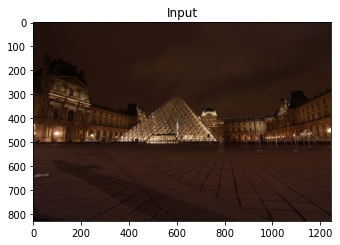

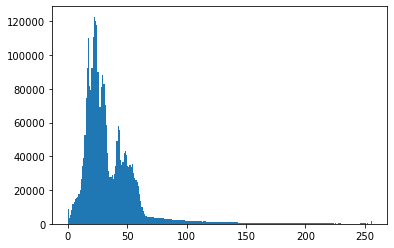

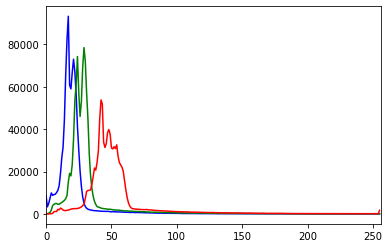

In [5]:
image = cv2.imread('../images/images/input.jpg')
imshow("Input", image)

# histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

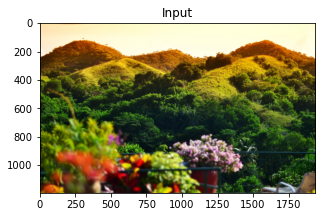

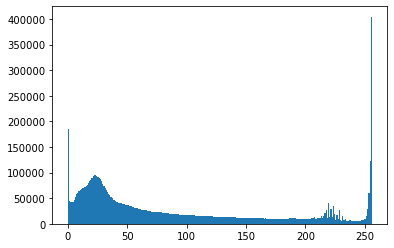

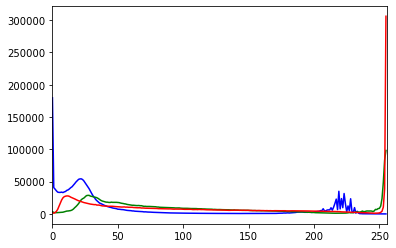

In [10]:
image = cv2.imread('../images/images/tobago.jpg')
imshow("Input", image)

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flatens our image array 
plt.hist(image.ravel(), 256, [0, 256]); plt.show()

# Viewing Separate Color Channels
color = ('b', 'g', 'r')

# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])
    
plt.show()

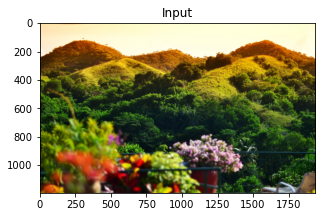

(1194, 1936, 3)
(2311584, 3)


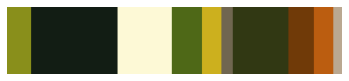

In [26]:
from sklearn.cluster import KMeans
import tensorflow as tf
image = cv2.imread('../images/images/tobago.jpg')
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

with tf.device('/device:GPU:0'):
    number_of_clusters = 10
    clt = KMeans(number_of_clusters)
    clt.fit(image)
    hist = centroidHistogram(clt)
    bar = plotColors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


In [19]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [20]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

In [21]:
get_available_gpus()

['/device:GPU:0']

In [23]:
def centroidHistogram(clt):
    # Create a histrogram for the clusters based on the pixels in each cluster
    # Get the labels for each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # Create our histogram 
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plotColors(hist, centroids):
    # Create our blank barchart
    bar = np.zeros((100, 500, 3), dtype = "uint8")

    x_start = 0
    # iterate over the percentage and dominant color of each cluster
    for (percent, color) in zip(hist, centroids):
      # plot the relative percentage of each cluster
      end = x_start + (percent * 500)
      cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
        color.astype("uint8").tolist(), -1)
      x_start = end
    return bar

In [4]:
from kmeanstf import KMeansTF

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [3]:
import tensorflow as tf

In [5]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
from tensorflow.python.client import device_lib as dev_lib
print (dev_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5569823059956292857
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1749391771
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13440222515839367000
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [7]:
from kmeanstf import KMeansTF
start_time = time.time()
kmeanstf = KMeansTF(n_clusters=100, random_state=12345)
GPU_Test = np.random.normal(size=(500000,5))
kmeanstf.fit(GPU_Test)
end_time = time.time()
print('Kmeans++ execution time in seconds: {}'.format(end_time - start_time))

TypeError: '<' not supported between instances of 'NoneType' and 'int'